In [2]:
import numpy as np
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('diabetes.csv')

In [6]:
X = df.drop('Outcome', axis=1).copy()
y = df['Outcome'].copy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [10]:
tpot = TPOTClassifier(verbosity=2, max_eval_time_mins=10)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress: 100%|██████████| 10100/10100 [4:24:41<00:00,  1.07pipeline/s]
                                                                                    
Best pipeline: LogisticRegression(PCA(BernoulliNB(LogisticRegression(BernoulliNB(SelectFwe(input_matrix, alpha=0.031), alpha=1.0, fit_prior=True), C=5.0, dual=False, penalty=l2), alpha=100.0, fit_prior=True), iterated_power=5, svd_solver=randomized), C=10.0, dual=False, penalty=l2)
0.7864583333333334


In [11]:
tpot.fitted_pipeline_

Pipeline(steps=[('selectfwe', SelectFwe(alpha=0.031)),
                ('stackingestimator-1',
                 StackingEstimator(estimator=BernoulliNB())),
                ('stackingestimator-2',
                 StackingEstimator(estimator=LogisticRegression(C=5.0))),
                ('stackingestimator-3',
                 StackingEstimator(estimator=BernoulliNB(alpha=100.0))),
                ('pca', PCA(iterated_power=5, svd_solver='randomized')),
                ('logisticregression', LogisticRegression(C=10.0))])

Export the model to a Python file

In [41]:
tpot.export('tpot_output_model.py')

Import the model to run accuracy tests

In [43]:
import tpot_output_model as tpot_model

In [55]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline

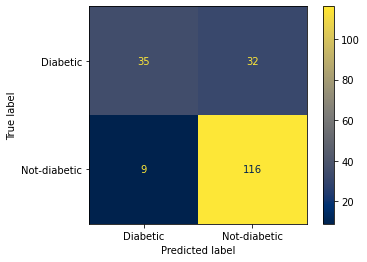

In [84]:
# plot_confusion_matrix(tpot_model.exported_pipeline, tpot_model.testing_features, tpot_model.testing_target,display_labels=["Not-diabetic", "Diabetic"], cmap='cividis')
plot_confusion_matrix(tpot_model.exported_pipeline, tpot_model.testing_features, tpot_model.testing_target, labels=[1,0], display_labels=["Diabetic", "Not-diabetic"], cmap='cividis')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
405,2.0,123.0,48.0,32.0,165.0,42.1,0.520,26.0
279,2.0,108.0,62.0,10.0,278.0,25.3,0.881,22.0
576,6.0,108.0,44.0,20.0,130.0,24.0,0.813,35.0
538,0.0,127.0,80.0,37.0,210.0,36.3,0.804,23.0
383,1.0,90.0,62.0,18.0,59.0,25.1,1.268,25.0


In [53]:
print(classification_report(tpot_model.testing_target, tpot_model.results))

              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85       125
         1.0       0.80      0.52      0.63        67

    accuracy                           0.79       192
   macro avg       0.79      0.73      0.74       192
weighted avg       0.79      0.79      0.77       192



In [54]:
print(balanced_accuracy_score(tpot_model.testing_target, tpot_model.results, sample_weight=None, adjusted=False))

0.7251940298507462


## Specificity and sensitivity

In [86]:
confusion_mat = confusion_matrix(tpot_model.testing_target, tpot_model.results, labels=[1,0])
confusion_mat

array([[ 35,  32],
       [  9, 116]], dtype=int64)

In [70]:
TP = confusion_mat[0,0]; TN=confusion_mat[1,1]; FN = confusion_mat[1,0]; FP = confusion_mat[0,1]

In [81]:
sensitivity = TP/(TP+FN)
print(f"{round(sensitivity*100,2)}% of the cases where the patient was diabetic and was correctly identified as diabetic")

79.55% of the cases where the patient was diabetic and was correctly identified as diabetic


In [82]:
specificity = TN/(TN+FP)
print(f"{round(specificity*100,2)}% of the cases without diabetes that were correctly identified")

78.38% of the cases without diabetes that were correctly identified
